[Reference](https://medium.datadriveninvestor.com/10-data-visualization-designs-you-need-to-know-about-de1da34332f4)

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the dataset
df = pd.read_csv('https://raw.githubusercontent.com/Tiamiyu1/Health-Insurance-Analysis/main/insurance.csv')

# 1. Plot Titles:

Text(0.5, 1.0, 'BMI Histigram Distribution')

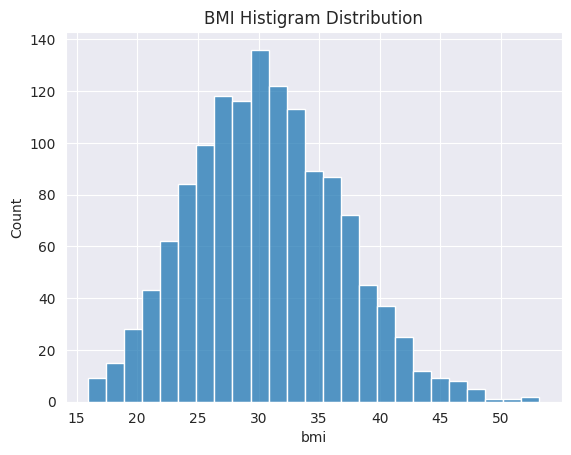

In [3]:
sns.histplot(df.bmi)
plt.title('BMI Histigram Distribution') # title

# 2. Axes Label

Text(0, 0.5, 'Insurance Charges')

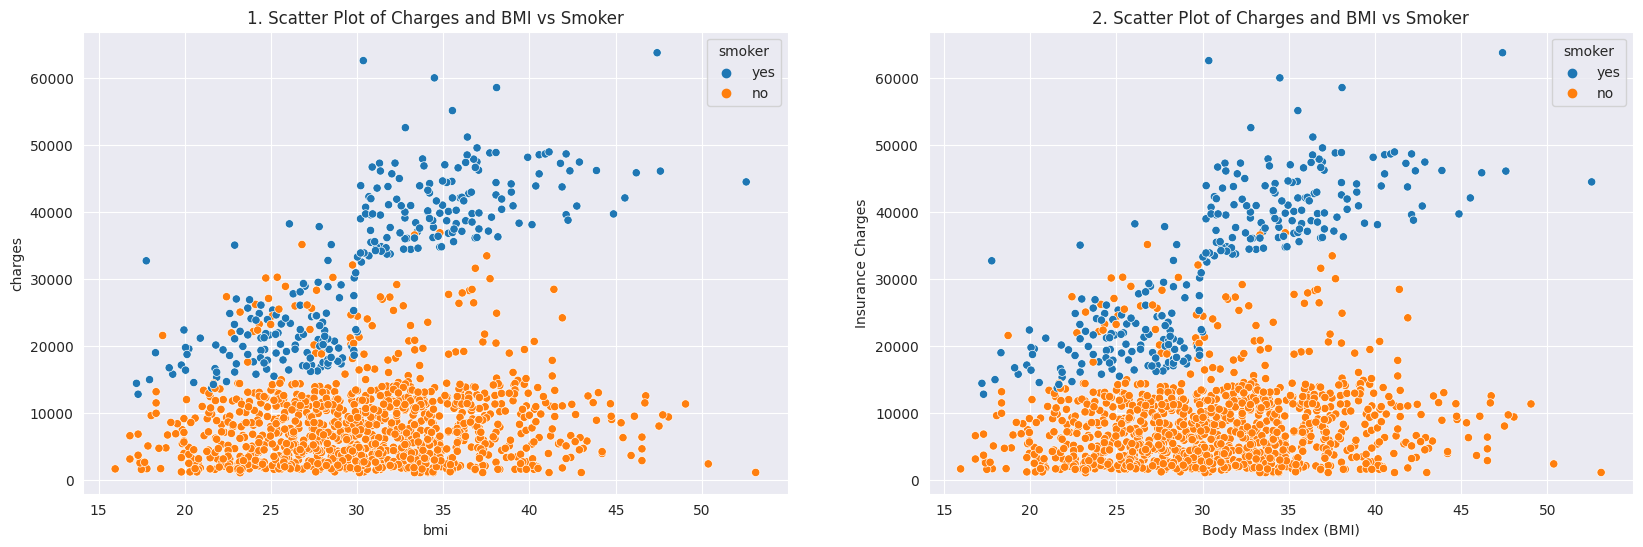

In [4]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1) # Plot 1 with default axes label
sns.scatterplot(x=df.bmi, y=df.charges,  hue=df.smoker)
plt.title('1. Scatter Plot of Charges and BMI vs Smoker')

plt.subplot(1,2,2) # Plot 2 with modified and informative axes label
sns.scatterplot(x=df.bmi, y=df.charges,  hue=df.smoker)
plt.title('2. Scatter Plot of Charges and BMI vs Smoker')
plt.xlabel('Body Mass Index (BMI)') # Xlabel
plt.ylabel('Insurance Charges') # Ylabel

# 3. Value Label

In [5]:
dff=df.copy()
dff.sex.replace({'female':1, 'male':0}, inplace=True)

([<matplotlib.axis.XTick at 0x7c82a7dce710>,
 [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

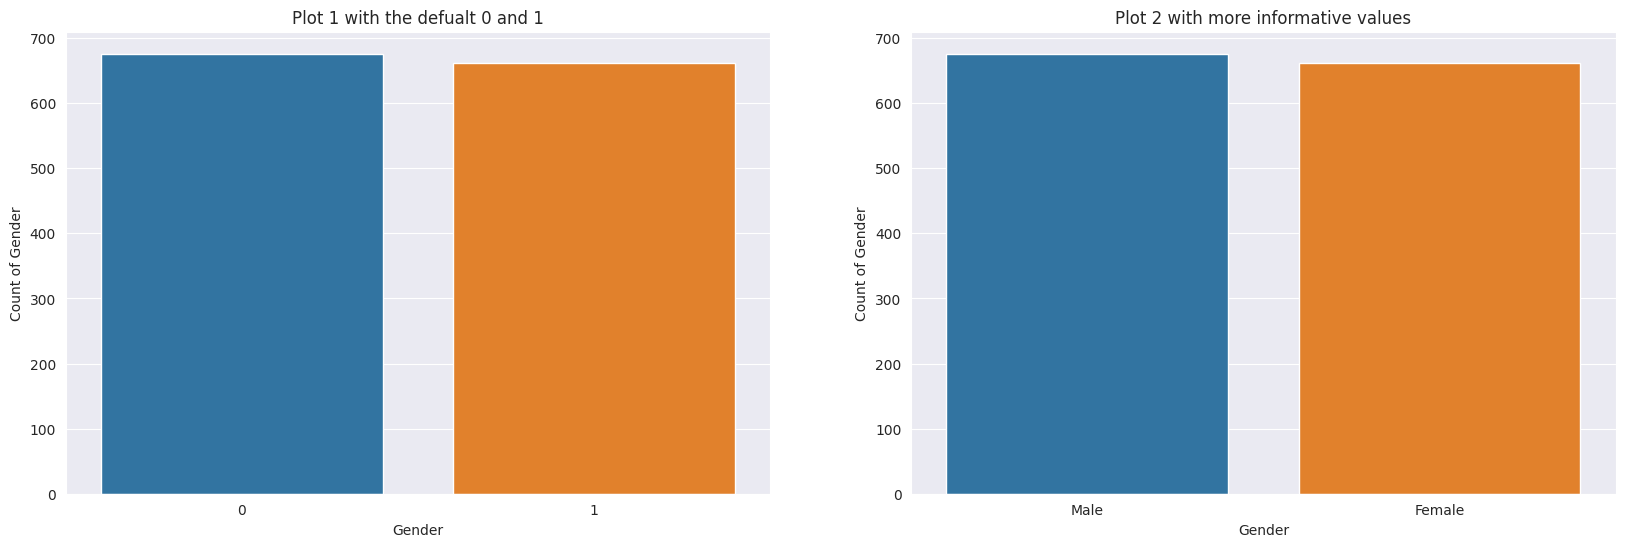

In [6]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1) # Plot 1 with default axes label
sns.countplot(x=dff.sex)
plt.title('Plot 1 with the defualt 0 and 1')
plt.xlabel('Gender') # Xlabel
plt.ylabel('Count of Gender') # Ylabel

plt.subplot(1,2,2) # Plot 2 with modified and informative axes label
sns.countplot(x=dff.sex)
plt.title('Plot 2 with more informative values')
plt.xlabel('Gender') # Xlabel
plt.ylabel('Count of Gender') # Ylabel
plt.xticks([0,1], ['Male', 'Female'])

# 4. Tidy Text Output

([<matplotlib.axis.XTick at 0x7c82a7e7cd30>,
 [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

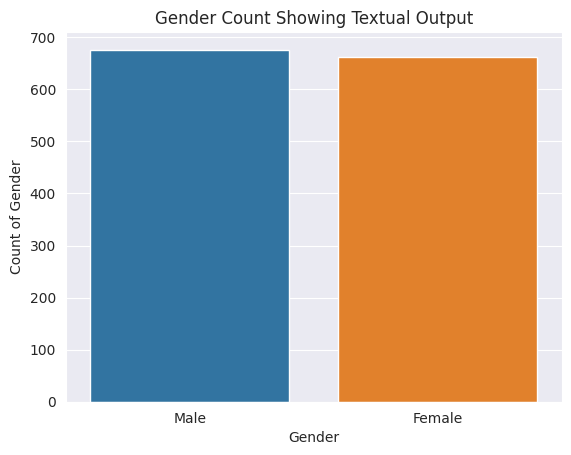

In [7]:
sns.countplot(x=dff.sex)
plt.title('Gender Count Showing Textual Output')
plt.xlabel('Gender') # Xlabel
plt.ylabel('Count of Gender') # Ylabel
plt.xticks([0,1], ['Male', 'Female'])

# 5. Color Scheme

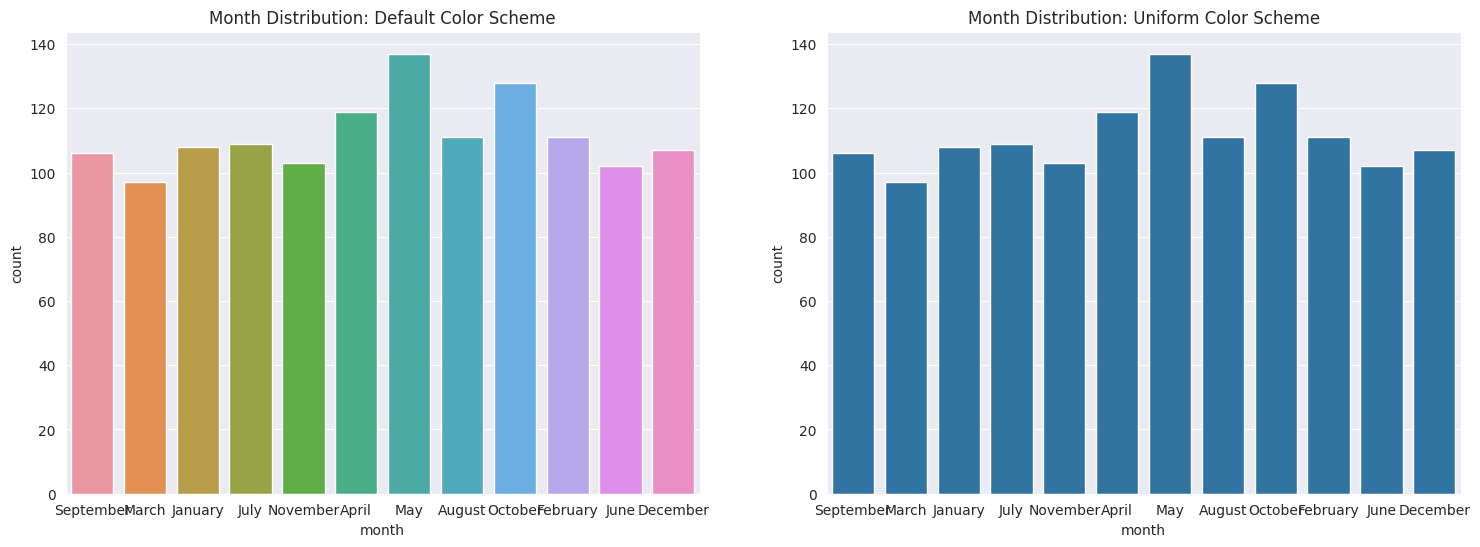

In [9]:
import datetime as dt
# we will introduce a dummy datetime column into the dataset and extract the month and year columns

start_date = pd.to_datetime('2021-01-01')
end_date = pd.to_datetime('2023-12-31')
df['datetime'] = pd.to_datetime(np.random.uniform(start_date.value, end_date.value, len(df)).astype(int))
df['month'] =  df.datetime.dt.month_name()
df['year'] =  df.datetime.dt.year

plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.countplot(x=df.month)
plt.title('Month Distribution: Default Color Scheme')

plt.subplot(1,2,2)
sns.countplot(x=df.month, color=sns.color_palette()[0])
plt.title('Month Distribution: Uniform Color Scheme' );

# 6. Axes Rotation

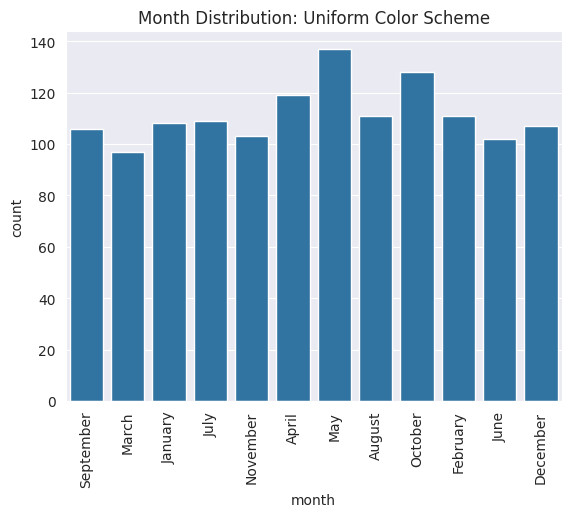

In [10]:
sns.countplot(x=df.month, color=sns.color_palette()[0])
plt.title('Month Distribution: Uniform Color Scheme' )
plt.xticks(rotation=90);

# 7. Ordering Categorical Variable
The presented count plot lacks a specific order.

# 8. Value Display on Plots

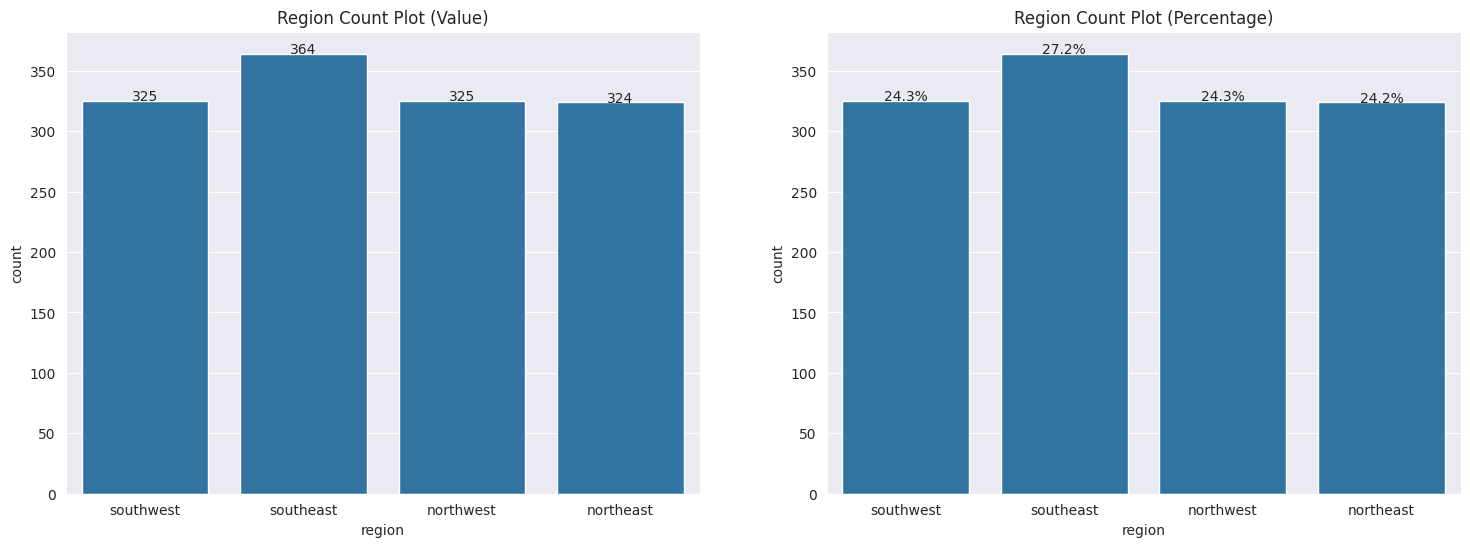

In [11]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
ax = sns.countplot(x=df.region,  color=sns.color_palette()[0])
plt.title('Region Count Plot (Value)')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + (p.get_width() / 2.), p.get_height()), ha='center', va='baseline')


plt.subplot(1,2,2)
ax = sns.countplot(x=df.region,  color=sns.color_palette()[0])
plt.title('Region Count Plot (Percentage)')
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+.05
    ax.annotate(percentage, (x, y),ha='center')

# 9. Pie Chart Customization

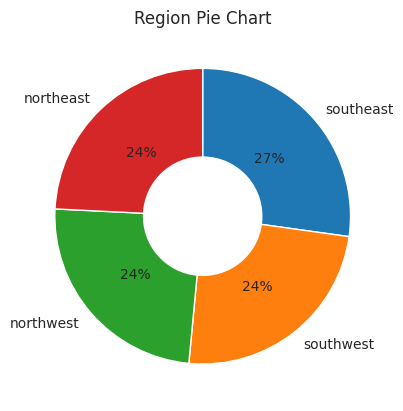

In [12]:
sorted_counts = df['region'].value_counts()

plt.pie(sorted_counts, labels=sorted_counts.index,  startangle = 90,
counterclock = False,  autopct='%.0f%%', wedgeprops = {'width' : 0.6})

plt.title('Region Pie Chart');

# 10. Legend Placement

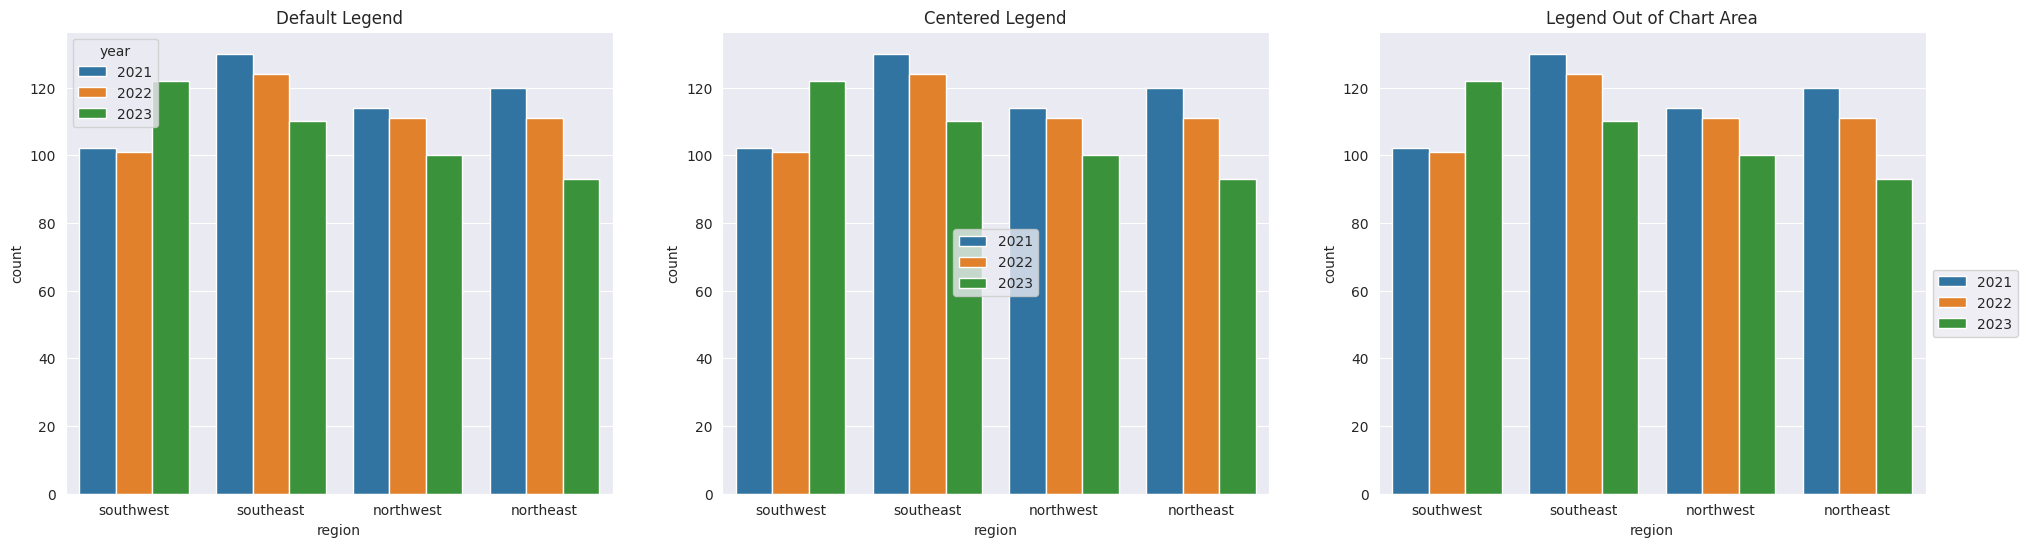

In [13]:
plt.figure(figsize=(24,6))

plt.subplot(1,3,1)
sns.countplot(x=df.region, hue=df.year)
plt.title('Default Legend')

plt.subplot(1,3,2)
sns.countplot(x=df.region, hue=df.year)
plt.title('Centered Legend')
plt.legend(loc="center") # try 'upper left', 'upper right', 'lower left', 'lower right'

plt.subplot(1,3,3)
sns.countplot(x=df.region, hue=df.year)
plt.title('Legend Out of Chart Area')
plt.legend(loc="best", bbox_to_anchor=(1, 0.5));

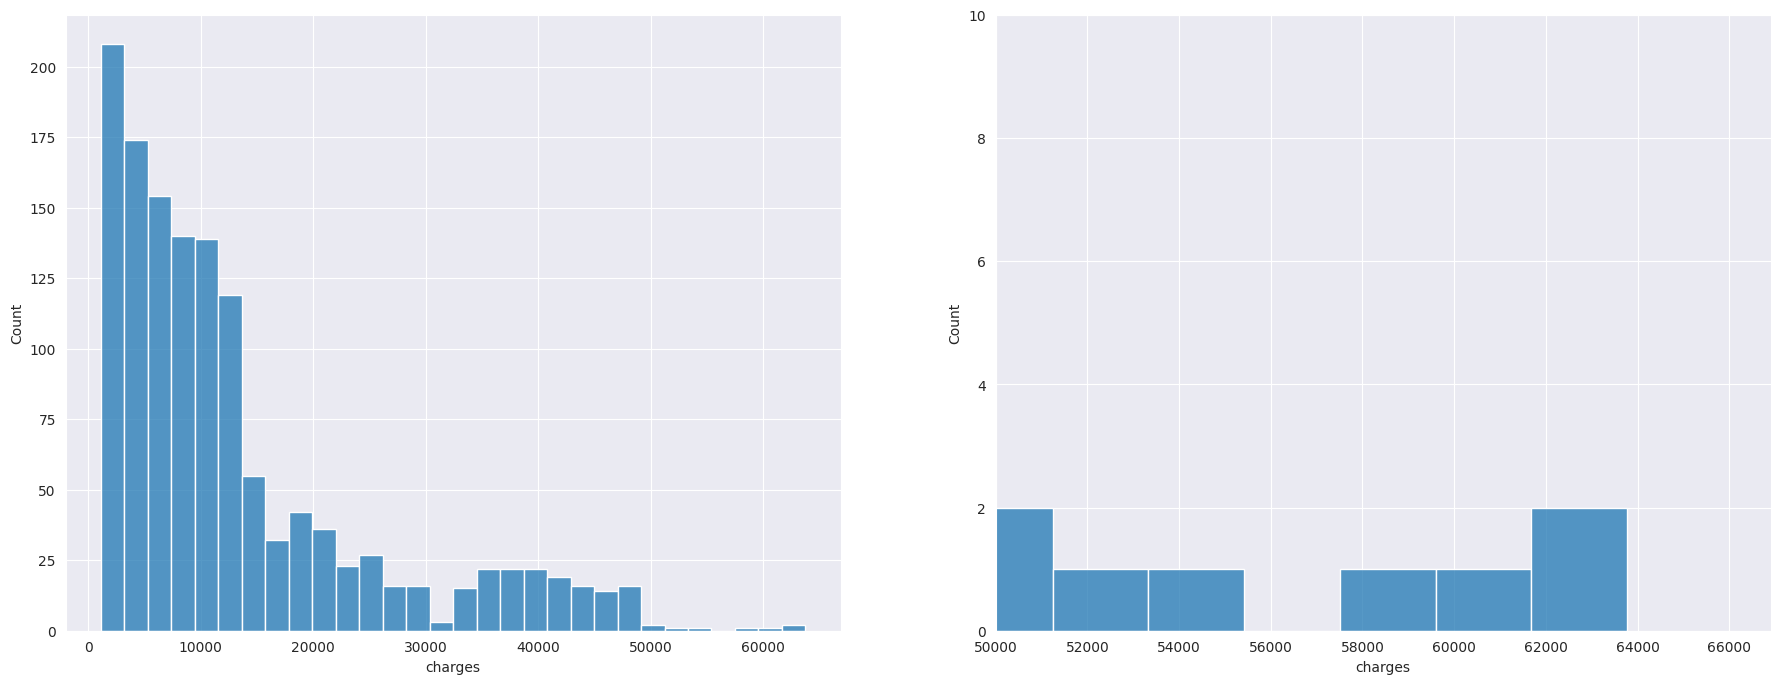

In [14]:
# Adjusting Axes Limits
# Axes Limits
plt.figure(figsize=(22,8))

plt.subplot(1,2,1) # Plot 1 with default axes label
sns.histplot(x=df.charges)

plt.subplot(1,2,2)
sns.histplot(x=df.charges)
plt.xlim(50000,)
plt.ylim(0,10);